## Step 1 Construct features using NLTK

In [139]:
import nltk
from nltk.corpus import stopwords
import string

import json


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1028.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [140]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [141]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [142]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [143]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [144]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [145]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [146]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [147]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [148]:
def getNumberOfPronoun(words):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
         
    for p in pronouns:
        count += words.count(p)
    
    return count

In [149]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [150]:
def getNumberOfConjunction(words):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']

    for c in conjunctions:
        count += words.count(c)
    
    return count

In [151]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division

# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'filename': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['filename'].append(content['filename'])
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(words_nonStemmed)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(words_nonStemmed)/normalizer)
        

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

218


,DisLegomena,HapaxLegomena,averageSentenceLength,filename,numberOfConjunction,numberOfPronoun,numberOfSentences,numberUniqueWords
act,,,,,,,,
KING RICHARD THE SECOND ACT IV.,0.037343,0.130559,14.260163,27.txt,0.006556,0.007982,246,0.208381
ALLS WELL THAT ENDS WELL ACT IV,0.031667,0.188333,12.000000,2.txt,0.003333,0.002500,100,0.254167
THE MERRY WIVES OF WINDSOR ACT I.,0.025308,0.100112,9.473445,23.txt,0.002563,0.001922,659,0.158097
THE TWO GENTLEMEN OF VERONA ACT III,0.030631,0.112109,11.309469,36.txt,0.005718,0.006126,433,0.176026
KING JOHN ACT V.,0.031367,0.143689,15.298851,16.txt,0.004696,0.004132,348,0.211871


In [152]:
# Filter out wierd acts, e.g. the beginning of a play

# df = df[df['averageSentenceLength'] < 30]

df.drop(["A MIDSUMMER NIGHT'S DREAM ACT1596","ALLS WELL THAT ENDS WELL ACT1603", "AS YOU LIKE IT ACT1601", 
              "CYMBELINE ACT1609","KING HENRY THE EIGHTH ACT1611","KING JOHN ACT1597","KING RICHARD III ACT1593",
             "KING RICHARD THE SECOND ACT1596", "LOVE'S LABOUR'S LOST ACT1595", "MEASURE FOR MEASURE ACT1605",
             "MUCH ADO ABOUT NOTHING ACT1599", "SECOND PART OF KING HENRY IV ACT1598", "THE COMEDY OF ERRORS ACT1593",
             "THE FIRST PART OF HENRY THE SIXTH ACT1592", "THE FIRST PART OF KING HENRY THE FOURTH ACT1598",
             "THE HISTORY OF TROILUS AND CRESSIDA ACT1602", "THE LIFE OF KING HENRY THE FIFTH ACT1599",
             "THE LIFE OF TIMON OF ATHENS ACT1608", "THE MERCHANT OF VENICE ACT1597", "THE MERRY WIVES OF WINDSOR ACT1601",
             "THE SECOND PART OF KING HENRY THE SIXTH ACT1591", "THE TAMING OF THE SHREW ACT1594", "THE TEMPEST ACT1612",
             "THE TRAGEDY OF ANTONY AND CLEOPATRA ACT1607", "THE TRAGEDY OF CORIOLANUS ACT1608",
              "THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT1604","THE TRAGEDY OF JULIUS CAESAR ACT1599",
             "THE TRAGEDY OF KING LEAR ACT1606", "THE TRAGEDY OF MACBETH ACT1606", 
              "THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT1605", "THE TRAGEDY OF ROMEO AND JULIET ACT1595",
             "THE TRAGEDY OF TITUS ANDRONICUS ACT1594", "THE TWO GENTLEMEN OF VERONA ACT1595", "THE WINTER'S TALE ACT1611",
             "TWELFTH NIGHT; OR, WHAT YOU WILL ACT1602"], inplace = True)

df_2 = df[['numberUniqueWords', 'averageSentenceLength']]
df_3 = df[['numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun']]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction']]

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


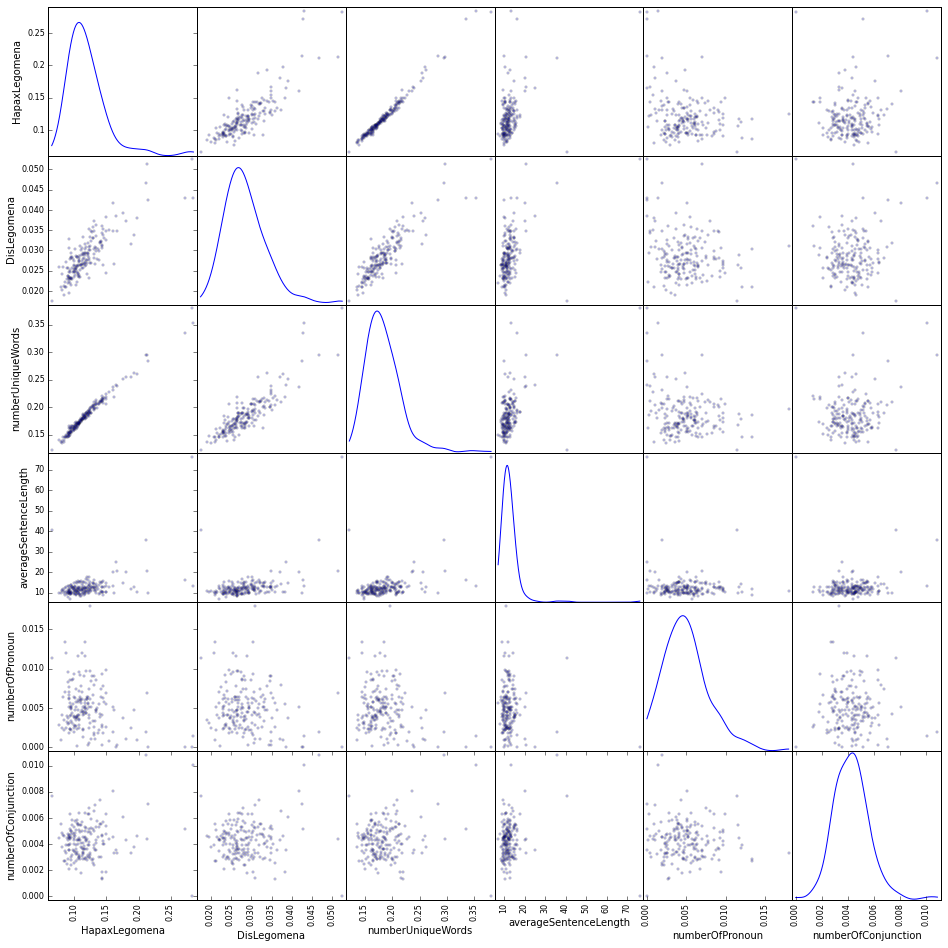

In [153]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [154]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [155]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

In [156]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_counts)
    X_tfidf = tfidf_transformer.transform(X_counts)
    return X_tfidf

In [157]:
randomState = np.random.seed(1)

def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X



In [158]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title)
df_ngrams.head()

Explained variance of the SVD step: 4%


,0,1,2,3,4,5
KING RICHARD THE SECOND ACT IV.,0.245100,0.143798,-0.232916,-0.505900,0.725102,0.288601
ALLS WELL THAT ENDS WELL ACT IV,0.452543,0.473535,-0.047475,0.010635,0.569923,-0.493750
THE MERRY WIVES OF WINDSOR ACT I.,0.339724,0.191315,-0.462515,0.729994,0.149856,-0.280566
THE TWO GENTLEMEN OF VERONA ACT III,0.461478,0.761461,-0.132721,0.083358,0.115596,-0.411448
KING JOHN ACT V.,0.545158,0.315765,0.341804,-0.209558,-0.449079,-0.490590


## Step 3 Combine n-grams and other features

In [159]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,0,1,2,3,4,5
act,,,,,,,,,,,,
KING RICHARD THE SECOND ACT IV.,0.130559,0.037343,0.208381,14.260163,0.007982,0.006556,0.245100,0.143798,-0.232916,-0.505900,0.725102,0.288601
ALLS WELL THAT ENDS WELL ACT IV,0.188333,0.031667,0.254167,12.000000,0.002500,0.003333,0.452543,0.473535,-0.047475,0.010635,0.569923,-0.493750
THE MERRY WIVES OF WINDSOR ACT I.,0.100112,0.025308,0.158097,9.473445,0.001922,0.002563,0.339724,0.191315,-0.462515,0.729994,0.149856,-0.280566
THE TWO GENTLEMEN OF VERONA ACT III,0.112109,0.030631,0.176026,11.309469,0.006126,0.005718,0.461478,0.761461,-0.132721,0.083358,0.115596,-0.411448
KING JOHN ACT V.,0.143689,0.031367,0.211871,15.298851,0.004132,0.004696,0.545158,0.315765,0.341804,-0.209558,-0.449079,-0.490590


## Step 4 Clustering

In [160]:
def clusterDocuments(X, n_clusters):

    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=5, random_state = randomState)
    km.fit_predict(X)    
    return km.labels_

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')

# Cluster only using n-grams as features
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 20)
labels = clusterDocuments(X, n_clusters = 20)
printClusters(labels)

Explained variance of the SVD step: 12%
[56, 65, 102, 133, 148, 176]
['ALLS WELL THAT ENDS WELL ACT II.' 'KING HENRY THE EIGHTH ACT II.'
 'KING HENRY THE EIGHTH ACT IV.' 'THE TWO GENTLEMEN OF VERONA ACT V. '
 'THE TRAGEDY OF JULIUS CAESAR ACT V. '
 'THE TRAGEDY OF ROMEO AND JULIET ACT I. ']


[38, 49, 57, 87, 95, 104, 120, 124, 126, 168, 180]
['THE TEMPEST ACT II.' 'THE TRAGEDY OF KING LEAR ACT IV.'
 'THE TRAGEDY OF CORIOLANUS ACT IV.' 'THE TAMING OF THE SHREW ACT V. '
 'THE FIRST PART OF HENRY THE SIXTH ACT I. '
 'THE TAMING OF THE SHREW ACT IV.' 'AS YOU LIKE IT ACT I. '
 'THE TRAGEDY OF KING LEAR ACT I. ' "THE WINTER'S TALE ACT IV."
 'THE LIFE OF TIMON OF ATHENS ACT V. ' 'THE TRAGEDY OF KING LEAR ACT III']


[8, 14, 27, 34, 44, 52, 67, 75, 94, 109, 110, 117, 134, 144, 151, 152, 154, 179]
['THE TRAGEDY OF MACBETH ACT IV.' 'MUCH ADO ABOUT NOTHING ACT I. '
 'THE TRAGEDY OF CORIOLANUS ACT III' "A MIDSUMMER NIGHT'S DREAM ACT II."
 'ALLS WELL THAT ENDS WELL ACT V S' 'MUCH ADO ABOUT NOTHING

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

In [161]:
# Cluster using all features
X = df_all.values
labels = clusterDocuments(X, n_clusters = 8)
printClusters(labels)

[3, 5, 6, 7, 12, 13, 14, 21, 22, 27, 40, 43, 47, 53, 55, 56, 57, 64, 67, 71, 75, 80, 84, 88, 93, 98, 101, 104, 110, 112, 114, 116, 119, 120, 127, 129, 130, 133, 136, 141, 142, 145, 146, 147, 153, 154, 156, 159, 162, 174, 175, 181]
['THE TWO GENTLEMEN OF VERONA ACT III'
 'THE LIFE OF TIMON OF ATHENS ACT IV.'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT I. '
 'THE TRAGEDY OF ROMEO AND JULIET ACT V. ' 'CYMBELINE ACT IV.'
 'ALLS WELL THAT ENDS WELL ACT IV.' 'MUCH ADO ABOUT NOTHING ACT I. '
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT II.'
 'THE TRAGEDY OF JULIUS CAESAR ACT II.' 'THE TRAGEDY OF CORIOLANUS ACT III'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT IV.'
 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT I. ' 'KING RICHARD III ACT IV.'
 'MEASURE FOR MEASURE ACT II.' "LOVE'S LABOUR'S LOST ACT IV."
 'ALLS WELL THAT ENDS WELL ACT II.' 'THE TRAGEDY OF CORIOLANUS ACT IV.'
 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT III'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT IV.'
 'THE FIRST PART OF KING HENRY TH

In [162]:
def print2D(X, x_label, y_label, title, labels):
    plt.scatter(X[:,0], X[:,1], c=labels, marker='+', s=100, linewidths=2)
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    xrange = xmax - xmin
    yrange = ymax - ymin
    
    xmin = xmin - xrange/10
    xmax = xmax + xrange/10
    
    ymin = ymin - yrange/10
    ymax = ymax + yrange/10
    
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.show()    


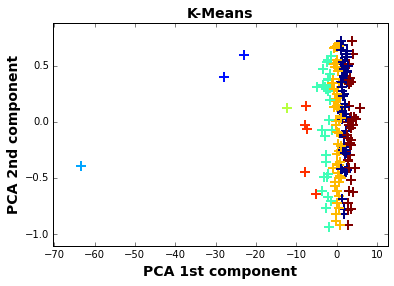

In [163]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2D_PCA = pca.fit_transform(X)

print2D(X_2D_PCA, 'PCA 1st component', 'PCA 2nd component', 'K-Means', labels)

In [164]:
def print3D(X, x_label, y_label, z_label, title, labels):
    fig = plt.figure(1, figsize=(11, 10))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    
    ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=labels.astype(np.float), s=50)
    ax.dist = 11

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    



/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


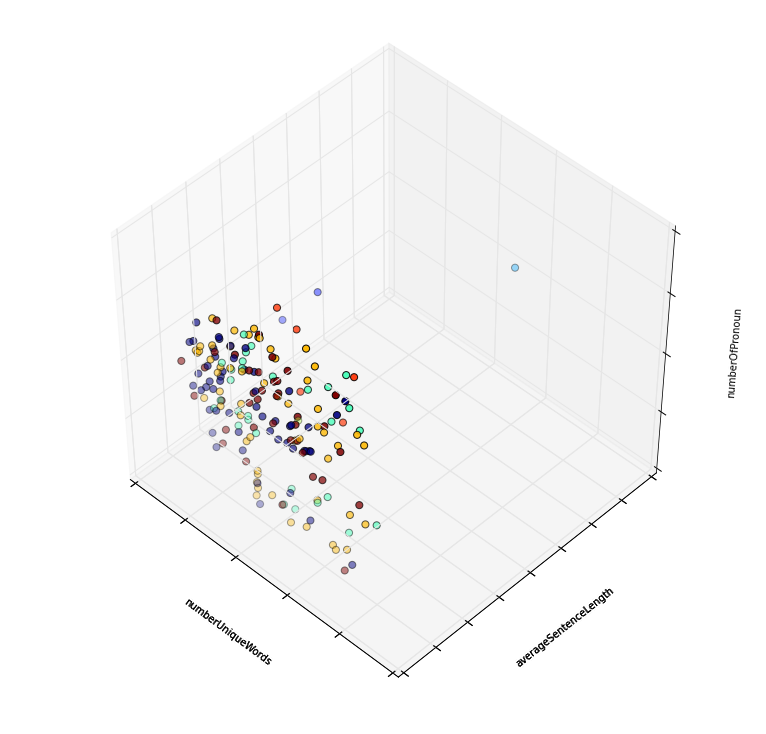

In [165]:
pca = PCA(n_components=3)
X_3D_PCA = pca.fit_transform(X)

print3D(X_3D_PCA, 'numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun', 'title', labels)

In [166]:
df_all.to_excel('all feature-v1027.xlsx')

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).